---
## Matplotlib Jargon

The _figure_ is the window or exportable area that can contain one or more plot.

The _axes_ is the plot itself.

Generally, we will make a figure, populate it with axis that contain our data, format those axis, and then export our figure for use elsewhere.

---
## Matplotlib Pick and Mix

There are many ways to make a matplotlib plot. 

We will start with a live demo of two common approaches and then discuss other variations.

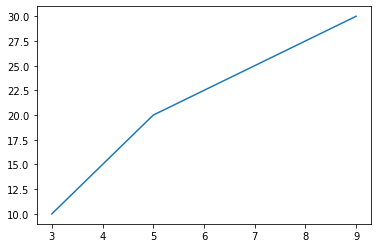

In [28]:
# Best for a quick look at your data or for a figure with just one plot
# Generates the figure and axis at the same time (referred to as a pyplot-style plot)
# Not reccomended for functions or scripts that will be reused as part of a larger project

import matplotlib.pyplot as plt

x = [3,5,9]
y = [10,20,30]

plt.plot(x,y)

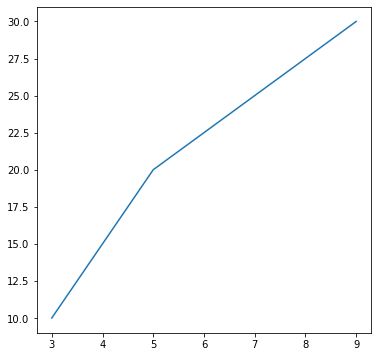

In [24]:
# Best for figure layouts with one or more plots that are the same size
# Figure and axis are specified explicitly
# Suitable for functions or scripts that will be reused as part of a larger project

import matplotlib.pyplot as plt

x = [3,5,9]
y = [10,20,30]

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.plot(x,y)

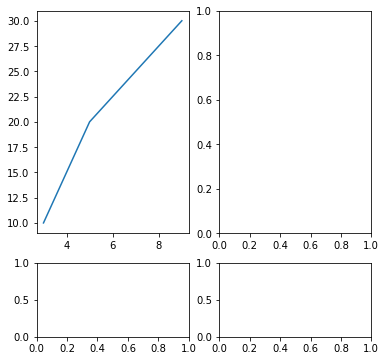

In [26]:
# Best for complex figure layouts with multiple plots of various sizes

from matplotlib.gridspec import GridSpec

x = [3,5,9]
y = [10,20,30]

fig = plt.figure(figsize=(6,6))

spec = GridSpec(
    ncols=2, 
    nrows=2, 
    width_ratios=[2,2], 
    height_ratios=[3,1]
)

ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
ax2 = fig.add_subplot(spec[2])
ax3 = fig.add_subplot(spec[3])

ax0.plot(x,y)

# more gridspec https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html
